<div class="usecase-title">Social Indicator Changes</div>

<div class="usecase-authors"><b>Authored by: </b> Thomas Rostov</div>

<div class="usecase-duration"><b>Duration:</b> 60 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Pandas, MatPlotLib</div>
</div>

<div class="usecase-section-header">Scenario</div>

As a council member, I would like to understand how social indicators have been changing and if any worrying trends are emerging, in order to allocate resources to help with these issues, and to plan ways to mitigate them for the future. I would also like to see how the specific demographic impacts these results, for example if people of certain ages have differing outcomes.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- Import multiple datasets using an API
- Do some data manipulation and cleaning to ensure consistency
- Create graphs comparing male/female indicator results yearly
- Do further data manipulation to average out and sort results by group
- Compare these grouped results using barcharts
- Do more dataset manipulation and merging to include the earlier dataset
- Create line graphs showing results from this merged dataframe
- Analyse how these indicator values differ and what that might show

<div class="usecase-section-header">Introduction</div>

This use case will analyse the differences in social indicator results based on various metrics such as the year/demographic. First, we will be analysing the social indicator changes using the datasets collected in the past six years, which have similar formats (2018-2023), splitting the results by gender. This is primarily to see the immediate impact of Covid on these indicator results. Then, the averages of the yearly results will be taken, and split by demographic, to see the potential differences that age/area/gender has on these indicators. Finally, an earlier dataset (2012-2016) will be introduced, allowing us to see how these indicators have changed over a longer timeframe, however this dataset sadly has less overlap with the newer ones, meaning there wont be as many directly comparable indicators.

### Importing Libraries and Data

Remember to use your own API key if downloading data using the API function. Otherwise, ensure the downloaded dataset filenames are correct. 

In [1]:
#Importing libraries
import requests
import statistics
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
#Importing datasets (API)
#comment out if using locally downloaded datasets

# def collect_data(dataset_id):
#     base_url = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/"
#     apikey = 
#     dataset_id = dataset_id
#     format = 'csv'

#     url = f'{base_url}{dataset_id}/exports/{format}'
#     params = {
#         'select': '*',
#         'limit': -1,  # all records
#         'lang': 'en',
#         'timezone': 'Australia/Melbourne',
#         'api_key': apikey  # use if use datasets API_key permissions
#     }

#     response = requests.get(url, params=params)

#     if response.status_code == 200:
#         # StringIO to read the CSV data
#         url_content = response.content.decode('utf-8')
#         dataset = pd.read_csv(StringIO(url_content), delimiter=';')
#         return dataset
#     else:
#         print(f'Request failed with status code {response.status_code}')
        
# data_2018 = collect_data('social-indicators-for-city-of-melbourne-residents-2018')
# data_2019 = collect_data('social-indicators-for-city-of-melbourne-residents-2019')
# data_2020 = collect_data('social-indicators-for-city-of-melbourne-residents-2020')
# data_2021 = collect_data('social-indicators-for-city-of-melbourne-residents-2021')
# data_2022 = collect_data('social-indicators-for-city-of-melbourne-residents-2022')
# data_2023 = collect_data('social-indicators-for-city-of-melbourne-residents-2023')
# data_2012_2016 = collect_data('indicators-of-wellbeing-by-year-future-melbourne')

# #ensuring same column naming scheme as those downloaded manually
# df_list = [data_2018, data_2019, data_2020, data_2021, data_2022, data_2023]
# for df in df_list:
#     column_names = df.columns.tolist()
#     cap_columns = [col.upper() for col in column_names]
#     df.columns = cap_columns
#     df.rename(columns={'RESPONDENT_GROUP': 'RESPONDENT GROUP', 'SAMPLE_SIZE': 'SAMPLE SIZE'}, inplace = True)
# df_list[3].rename(columns = {'RESPONDENT_GROUP0': 'RESPONDENT GROUP'}, inplace = True)
# data_2012_2016.rename(columns = {'indicator_label': 'Indicator label', 
#                                  'indicator_description': 'Indicator description', 
#                                  'unit': 'Unit', 'population': 'Population', 'source': 'Source'}, inplace = True)

In [3]:
#Importing Datasets (Downloaded)
#comment out if using API 

data_2018 = pd.read_csv('social-indicators-for-city-of-melbourne-residents-2018.csv')
data_2019 = pd.read_csv('social-indicators-for-city-of-melbourne-residents-2019.csv')
data_2020 = pd.read_csv('social-indicators-for-city-of-melbourne-residents-2020.csv')
data_2021 = pd.read_csv('social-indicators-for-city-of-melbourne-residents-2021.csv')
data_2022 = pd.read_csv('social-indicators-for-city-of-melbourne-residents-2022.csv')
data_2023 = pd.read_csv('social-indicators-for-city-of-melbourne-residents-2023.csv')
data_2012_2016 = pd.read_csv('indicators-of-wellbeing-by-year-future-melbourne.csv')

### Data Cleaning

Before we can begin analysing the data, we first need to clean it and fix some discrepancies. Although these are related datasets, some vary slightly in format and the indicators that they measure, meaning these need to be standardised for easier comparison.

In [4]:
#Replacing with proper respondent group format
data_2020['RESPONDENT GROUP'] = data_2020['RESPONDENT GROUP'].replace('18-24', '18-24 years')
data_2020['RESPONDENT GROUP'] = data_2020['RESPONDENT GROUP'].replace('25-34', '25-34 years')
data_2020['RESPONDENT GROUP'] = data_2020['RESPONDENT GROUP'].replace('35-44', '35-44 years')
data_2020['RESPONDENT GROUP'] = data_2020['RESPONDENT GROUP'].replace('45-54', '45-54 years')
data_2020['RESPONDENT GROUP'] = data_2020['RESPONDENT GROUP'].replace('55-64', '55-64 years')
data_2020['RESPONDENT GROUP'] = data_2020['RESPONDENT GROUP'].replace('65+', '65+ years')

In [5]:
#Changing the 2018 dataframe to have averages be 0-100 instead of 0-10 to match the other datasets
average_rows = data_2018['RESPONSE'] == 'Average satisfaction score (from 0-10)'
data_2018.loc[average_rows, 'RESULT'] = data_2018.loc[average_rows, 'RESULT'] * 10

In [6]:
#Determing what indicators are shared between the 2018 - 2023 datasets 
unique_list = data_2018['DESCRIPTION'].unique()
common_list = []

unique_2019 = data_2019['DESCRIPTION'].unique()
unique_2020 = data_2020['DESCRIPTION'].unique()
unique_2021 = data_2021['DESCRIPTION'].unique()
unique_2022 = data_2022['DESCRIPTION'].unique()
unique_2023 = data_2023['DESCRIPTION'].unique()

#If the indicator is in each dataset add it to the list
for i in unique_list:
    if i in unique_2019 and i in unique_2020 and i in unique_2021 and i in unique_2022 and i in unique_2023:
        common_list.append(i)

In [7]:
#Some of the indicators are percentage based, while others are average based
#This creates a list to differentiate percentage or average score
average_or_percentage_r = []
for i in common_list:
    average_or_percentage_r.append(data_2018[data_2018['DESCRIPTION'] == i]['FORMAT'].unique()[0])
    
average_or_percentage = ['Percentage' if x == 'Per cent' else 'Average (out of 100)' if x == 'Average' else x for x in average_or_percentage_r]

In [8]:
#Creating a DF list for easy DF iteration
df_list = [data_2018, data_2019, data_2020, data_2021, data_2022, data_2023]

### Interactive Visualization

Now that we have a list of datasets, we can plot comparisons between them, which is done using the below function. This will allow us to visualise the comparison of various indicators both by year and by gender, from 2018 through to 2023.

In [9]:
#Function to create a plot for comparing male and female results
def update_plot(input_num):
    num = input_num
    
    #stores the results for each year
    year_list = [2018, 2019, 2020, 2021, 2022, 2023]
    male_list = []
    female_list = []

    #retrieves the results for each year from the respective DF. 
    for df in df_list:
        male_list.append(df[(df['DESCRIPTION'] == common_list[num]) & (df['RESPONDENT GROUP'] == 'Male')]['RESULT'].iloc[0])
        female_list.append(df[(df['DESCRIPTION'] == common_list[num]) & (df['RESPONDENT GROUP'] == 'Female')]['RESULT'].iloc[0])
        
    #plots the indicator values against the year for each group. 
    yoffset = 15
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(year_list, male_list)
    axs[0].set_title('Males')
    axs[0].set_xlabel('Year')
    axs[0].set_ylabel(average_or_percentage[num])
    axs[0].grid(True)
    axs[0].set_ylim(min(male_list) - yoffset, max(male_list) + yoffset)

    axs[1].plot(year_list, female_list)
    axs[1].set_title('Females')
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel(average_or_percentage[num])
    axs[1].grid(True)
    axs[1].set_ylim(min(female_list) - yoffset, max(female_list) + yoffset)

    #checks what the measurement is. 
    if average_or_percentage[num] == 'Percentage':
        fig.suptitle('Percentage of people who ' + common_list[num], fontsize=16, y=1, x=0.5)
    if average_or_percentage[num] == 'Average (out of 100)':
        fig.suptitle('Average score for ' + common_list[num], fontsize=16, y=1, x=0.5)

    plt.show()

In [10]:
#Creating a widget selection
dropdown_options = widgets.Dropdown(
    options=common_list,
    value='Participate in adequate physical activity',
    description='Select the metric to compare',
    disabled=False,
    layout=widgets.Layout(width='700px'),
    style={'description_width': 'initial'}
)

In [11]:
#Widget logic
def on_button_click(a):
    plot_input = common_list.index(dropdown_options.value)
    update_plot(plot_input)

button = widgets.Button(description="Create Graphs")
button.on_click(on_button_click)

display(widgets.HBox([dropdown_options]))
display(button)

Button(description='Create Graphs', style=ButtonStyle())

### Analysis Regarding Impact Of Covid

Below I have selected what I believe to be interesting results regarding the impact of covid on various social indicators. Other indicators have been primarily excluded due to being too choppy (no trend).

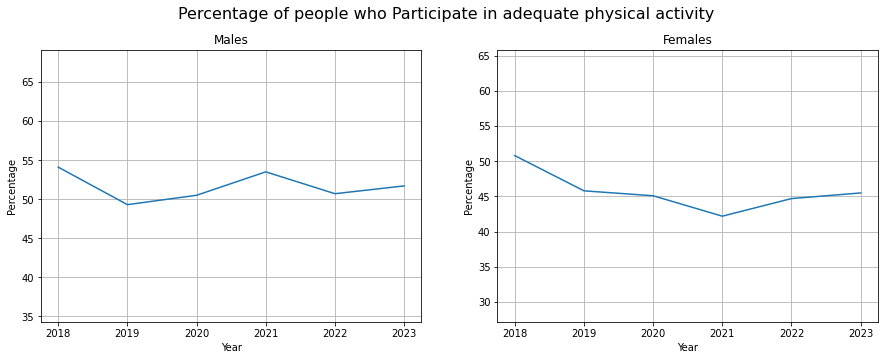

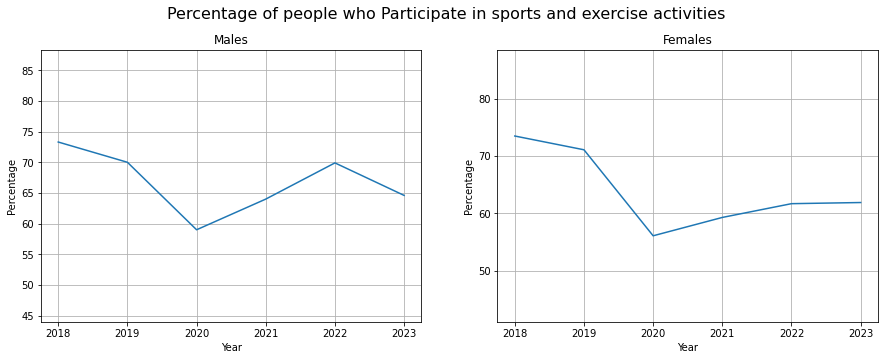

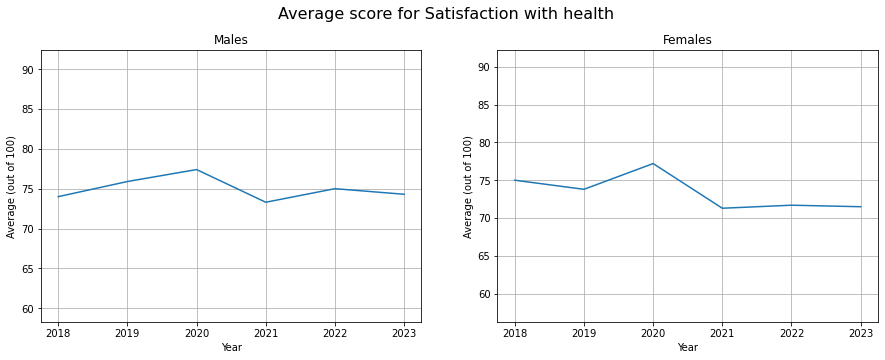

In [12]:
#Exercise/Health Indicators
update_plot(0) 
update_plot(1) 
update_plot(13) 

This graph shows a tangible decrease in the percentage of people who participate in sports and exercise activities within the City of Melbourne during the first year of Covid, however participation in adequate physical activity surprisingly didnt see nearly as much of a drop, and satisfaction with health actually saw an increase for both genders. 

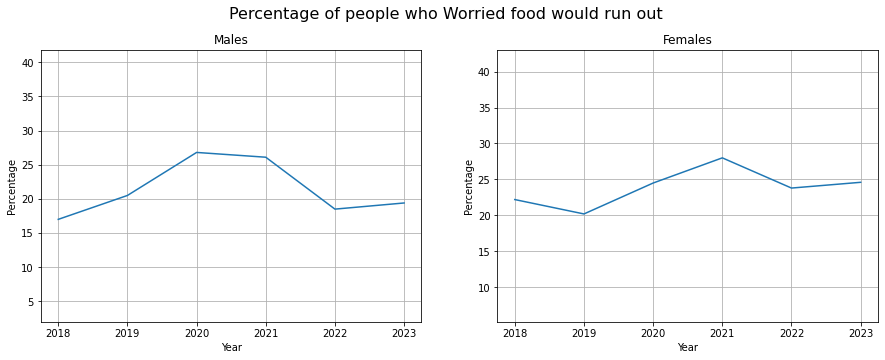

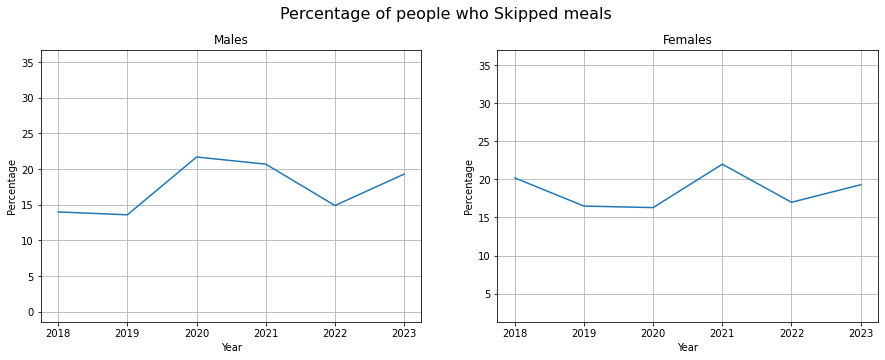

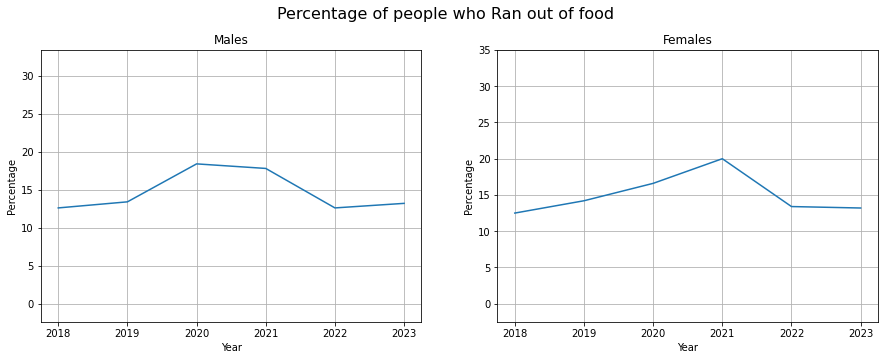

In [13]:
#Food Security Indicators
update_plot(4) 
update_plot(5) 
update_plot(6) 

These graphs show that covid had a negative impact on both percieved and realised food security for both genders. However food insecurity for females peaked during the 2021 year, while for males it peaked during 2020, staying at approximately the same level during 2021.

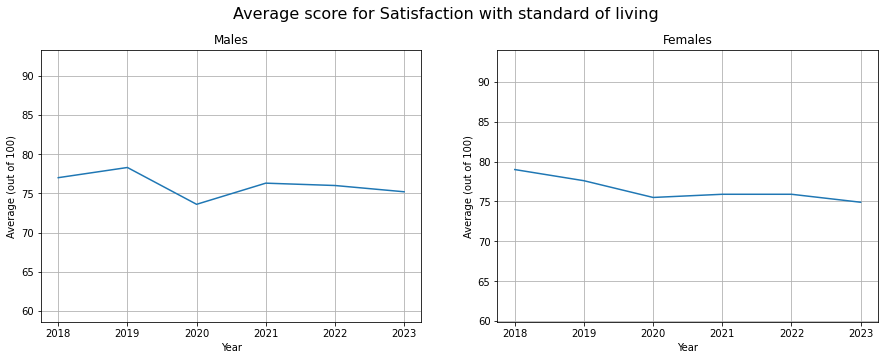

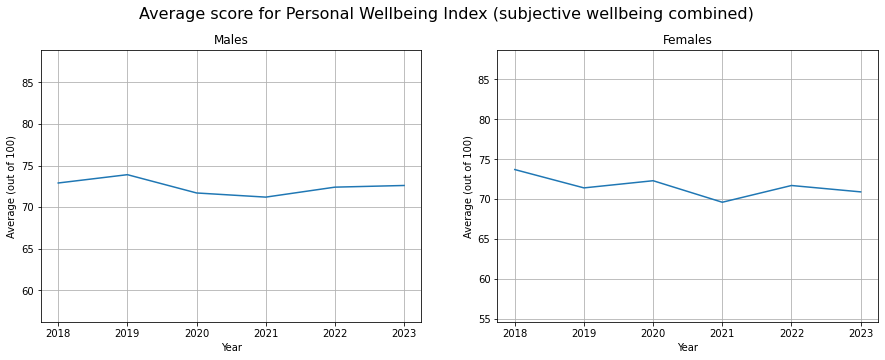

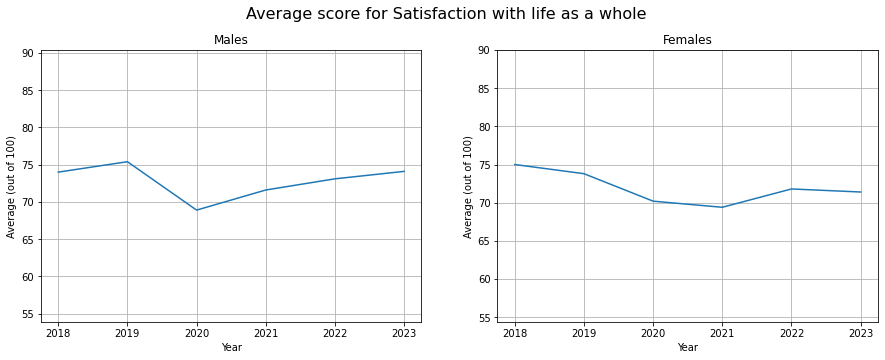

In [14]:
#General Life Satisfaction Indicators
update_plot(12) 
update_plot(19) 
update_plot(20) 

These graphs show a slight decrease in overall life satisfaction using various indicators for both men and women during and after covid. A slight rebound is observed in the final graph, however this could be due to random chance as its not consistent with the other indicators shown.

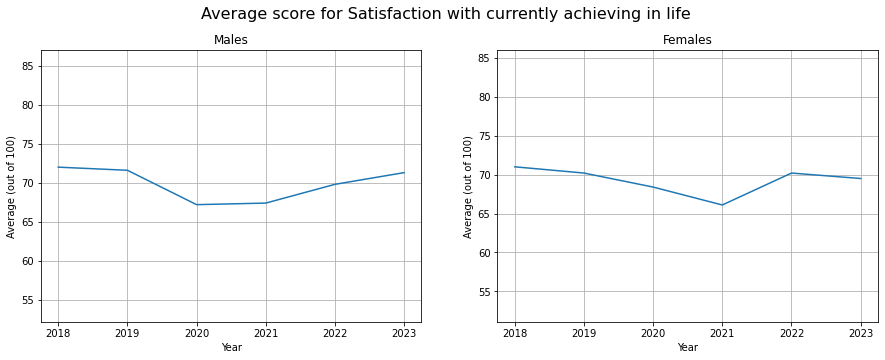

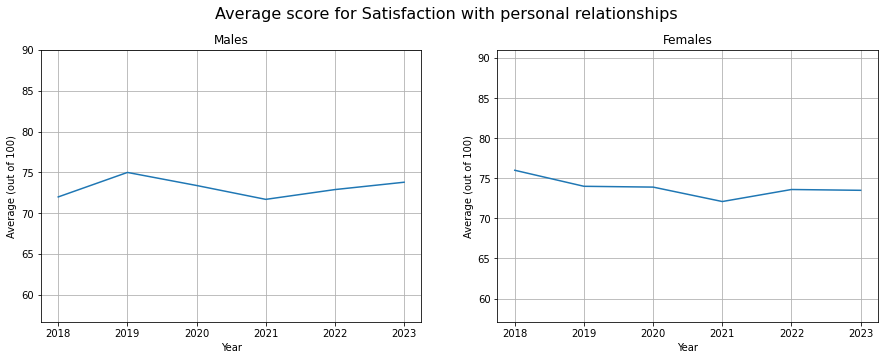

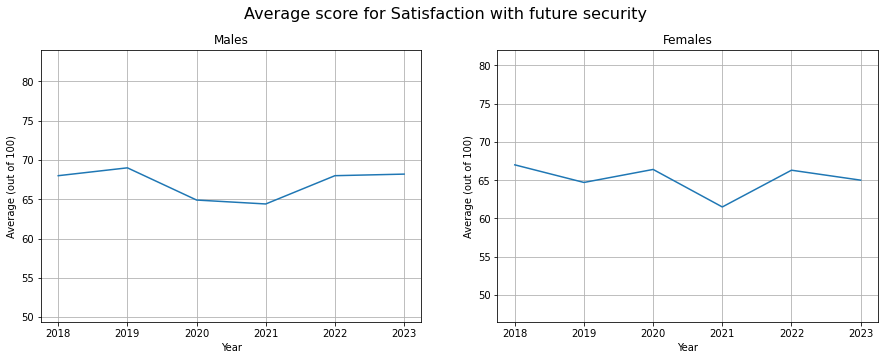

In [15]:
#More Specific Life Satisfaction Indicators
update_plot(14)
update_plot(15) 
update_plot(18) 

These graphs show a slight decrease in satisfaction regarding specific areas, being achievements, relationships and future security for both genders during covid. A slight rebound is observed in each area post-covid.

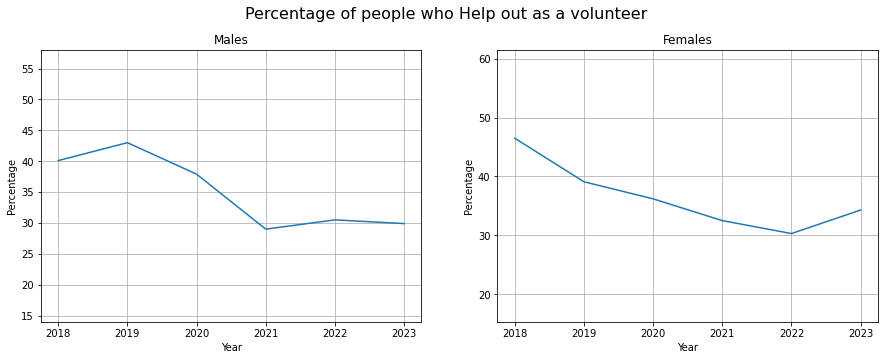

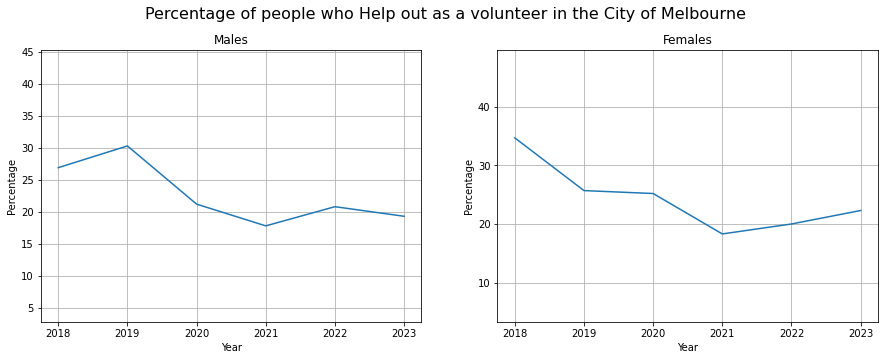

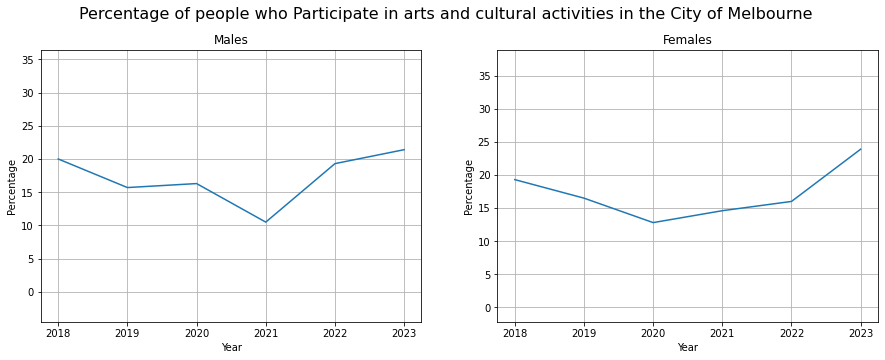

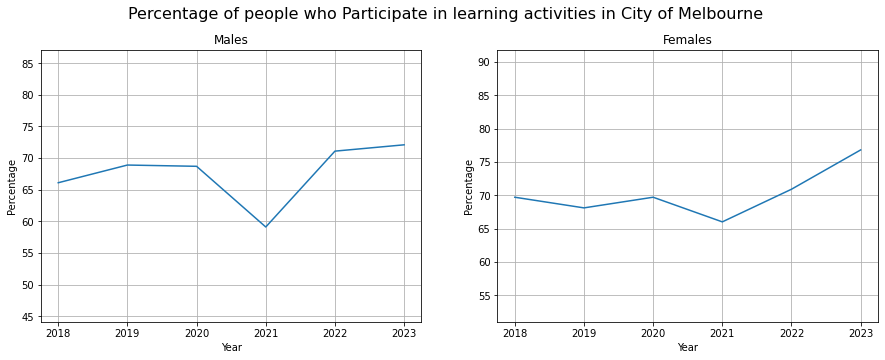

In [16]:
#Community Participation Indicators
update_plot(10)
update_plot(22) 
update_plot(23)
update_plot(24) 

These graphs show that covid has had a significant impact in regards to community participation, with substantially less people helping out as volunteers or participating in arts/cultural and learning activities within the City of Melbourne.

## Averaging Out Data By Year and Grouping by Respondent Group

Now that we have compared indicators by year, we could also compare indicator results based on respondent group, to see how this potentially influences the results. In order to do this, the indicators shared between all datasets will first be found, and the results will then be averaged throughout the years. Some data cleaning will also need to be performed to create better visualizations.

In [17]:
#Determining unique respondent groups
unique_groups_r = data_2018[data_2018['DESCRIPTION'] == 'Participate in adequate physical activity']['RESPONDENT GROUP'].unique()
unique_2019 = data_2019[data_2019['DESCRIPTION'] == 'Participate in adequate physical activity']['RESPONDENT GROUP'].unique()
unique_2020 = data_2020[data_2020['DESCRIPTION'] == 'Participate in adequate physical activity']['RESPONDENT GROUP'].unique()
unique_2021 = data_2021[data_2021['DESCRIPTION'] == 'Participate in adequate physical activity']['RESPONDENT GROUP'].unique()
unique_2022 = data_2022[data_2022['DESCRIPTION'] == 'Participate in adequate physical activity']['RESPONDENT GROUP'].unique()
unique_2023 = data_2023[data_2023['DESCRIPTION'] == 'Participate in adequate physical activity']['RESPONDENT GROUP'].unique()
unique_groups = []

#checks if the group exists in each dataset
for i in unique_groups_r:
    if i in unique_2019 and i in unique_2020 and i in unique_2021 and i in unique_2022 and i in unique_2023:
        unique_groups.append(i)

In [18]:
#creates a dataframe with the averages of each result (2018-2023) for a specific respondent group and indicator 
df_list = [data_2018, data_2019, data_2020, data_2021, data_2022, data_2023]
df_list_form = []
average = 0

#loops throughout each indicator
for i in range(len(common_list)):
    #loops throughout each respondent group
    for x in unique_groups:
        #loops through each yearly dataframe, averaging the results and storing them in a list
        list_of_results = [] 
        for df in df_list:
            res = df[(df['DESCRIPTION'] == common_list[i]) & (df['RESPONDENT GROUP'] == x)]['RESULT'].iloc[0]
            list_of_results.append(res)
        average = statistics.mean(list_of_results)
        df_list_form.append([common_list[i], x, average])
        average = 0
        
data_averages = pd.DataFrame(df_list_form, columns=['DESCRIPTION', 'RESPONDENT GROUP', 'RESULT'])

In [19]:
#seperating into age, area and gender
listage = ['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65+ years']
data_age = data_averages[data_averages['RESPONDENT GROUP'].isin(listage)].copy()
listarea = ['East Melbourne 3002', 'Melbourne 3000', 'Docklands 3008', 'City of Melbourne', 'Carlton 3053', 'North Melbourne 3051 / West Melbourne 3003', 'Parkville 3052']
data_area = data_averages[data_averages['RESPONDENT GROUP'].isin(listarea)].copy()
listgender = ['Male', 'Female']
data_gender = data_averages[data_averages['RESPONDENT GROUP'].isin(listgender)].copy()

In [20]:
#sorts to ensure age is in desired order
respondent_order = ['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65+ years']
data_age['RESPONDENT GROUP'] = pd.Categorical(data_age['RESPONDENT GROUP'], categories = respondent_order, ordered=True)
data_age = data_age.sort_values(by = ['DESCRIPTION', 'RESPONDENT GROUP'])

In [21]:
#replacing an unecessarily long data area category
data_area['RESPONDENT GROUP'] = data_area['RESPONDENT GROUP'].replace({'North Melbourne 3051 / West Melbourne 3003':'N/W Melb 3015/3003'})

### Plotting Bar Graphs to Compare Groups

Instead of using line graphs, bar graphs will instead be used as they are more suitable for comparing categories. Similar functions will be created like above, but this time to compare demographic groups.

In [22]:
#creates a barchart to plot a specific indicator against a dataframe
def create_barchart(num, df):
    x_b = df[df['DESCRIPTION'] == common_list[num]]['RESPONDENT GROUP'].tolist()
    y_b = df[df['DESCRIPTION'] == common_list[num]]['RESULT'].tolist()
    
    plt.bar(x_b, y_b)
    plt.xticks(rotation=90)
    plt.xlabel('Respondent Group')
    plt.ylabel(average_or_percentage[num])
    if average_or_percentage[num] == 'Percentage':
        plt.title('Percentage of people who ' + common_list[num])
    if average_or_percentage[num] == 'Average (out of 100)':
        plt.title('Average score for ' + common_list[num])
    plt.show()

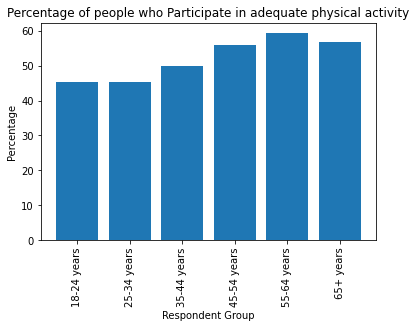

In [23]:
#age
create_barchart(0, data_age)

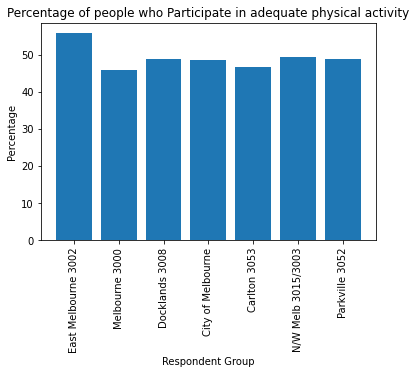

In [24]:
#area
create_barchart(0, data_area)

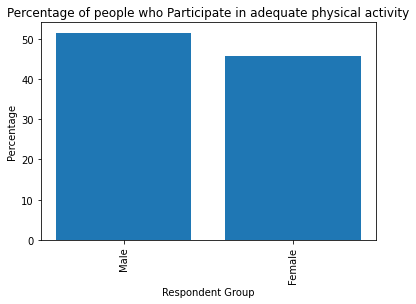

In [25]:
#gender
create_barchart(0, data_gender)

In [26]:
#side by side demographic comparison
def demographic_comparison_barchart(num, df1, df2, df3):
    #gets the results for each respondent group category
    x_b = df1[df1['DESCRIPTION'] == common_list[num]]['RESPONDENT GROUP'].tolist()
    y_b = df1[df1['DESCRIPTION'] == common_list[num]]['RESULT'].tolist()
    x_b_2 = df2[df2['DESCRIPTION'] == common_list[num]]['RESPONDENT GROUP'].tolist()
    y_b_2 = df2[df2['DESCRIPTION'] == common_list[num]]['RESULT'].tolist()
    x_b_3 = df3[df3['DESCRIPTION'] == common_list[num]]['RESPONDENT GROUP'].tolist()
    y_b_3 = df3[df3['DESCRIPTION'] == common_list[num]]['RESULT'].tolist()
    
    #creates 3 plots, to compare all the different respondent groups side by side 
    fig, axs = plt.subplots(1, 3, figsize = (15,5))
    if average_or_percentage[num] == 'Percentage':
        fig.suptitle('Percentage of people who ' + common_list[num], fontsize=16, y=1, x=0.5)
    if average_or_percentage[num] == 'Average (out of 100)':
        fig.suptitle('Average score for ' + common_list[num], fontsize=16, y=1, x=0.5)
    
    axs[0].bar(x_b, y_b)
    axs[0].set_xlabel('Respondent Group')
    axs[0].set_ylabel(average_or_percentage[num])
    axs[0].tick_params(axis='x', rotation=90)
    
    axs[1].bar(x_b_2, y_b_2)
    axs[1].set_xlabel('Respondent Group')
    axs[1].set_ylabel(average_or_percentage[num])
    axs[1].tick_params(axis='x', rotation=90)
    
    axs[2].bar(x_b_3, y_b_3)
    axs[2].set_xlabel('Respondent Group')
    axs[2].set_ylabel(average_or_percentage[num])
    axs[2].tick_params(axis='x', rotation=90)

    plt.show()

In [27]:
#Widget logic
def on_button_click(a):
    plot_input = common_list.index(dropdown_options.value)
    demographic_comparison_barchart(plot_input, data_age, data_area, data_gender)

button = widgets.Button(description="Create Graphs")
button.on_click(on_button_click)

display(widgets.HBox([dropdown_options]))
display(button)

Button(description='Create Graphs', style=ButtonStyle())

### Demographic Analysis

Using the created plotting functions, we can now analyse various indicators based on demographic group. I have created analysis of multiple indicators below, grouped based on category (eg: community participation)

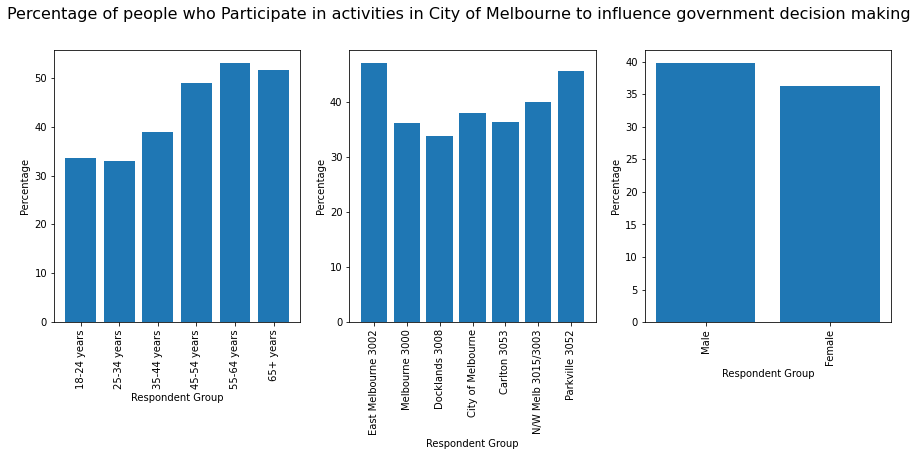

In [28]:
demographic_comparison_barchart(3, data_age, data_area, data_gender)

From this graph, it can be seen that people participate more in government decision making as they grow older, with the greatest percentage of participants being from East Melbourne 3002. This could potentially mean decisions are skewed in favour of these groups due to their larger participation.

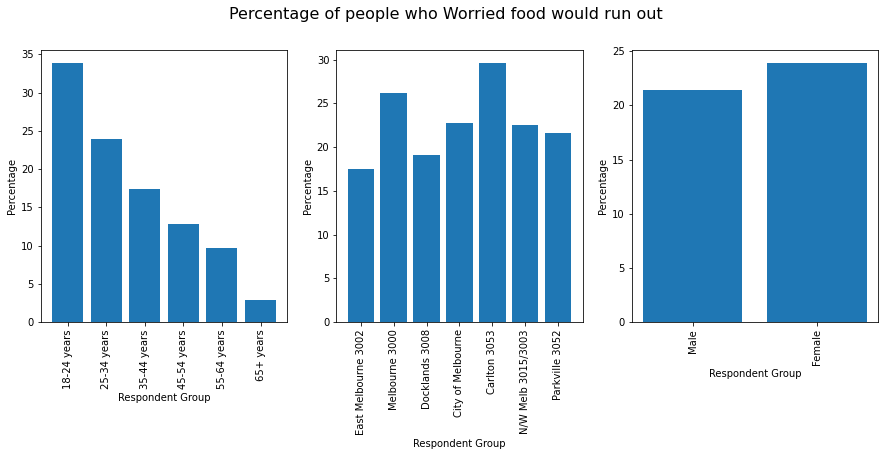

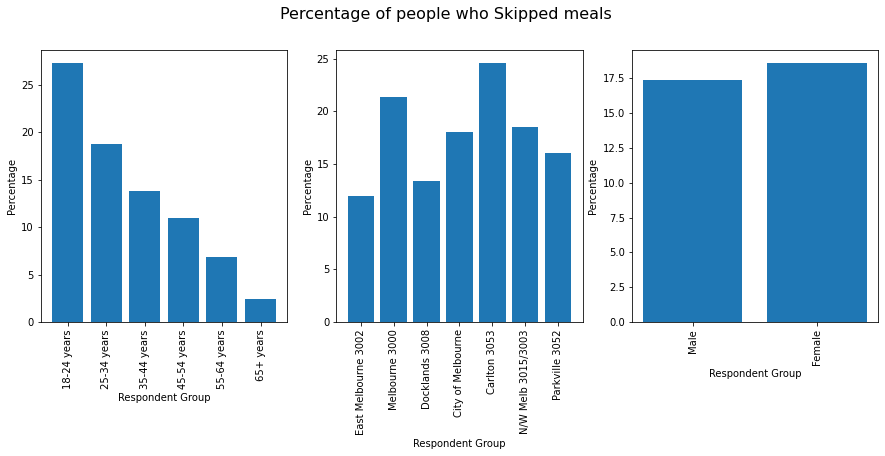

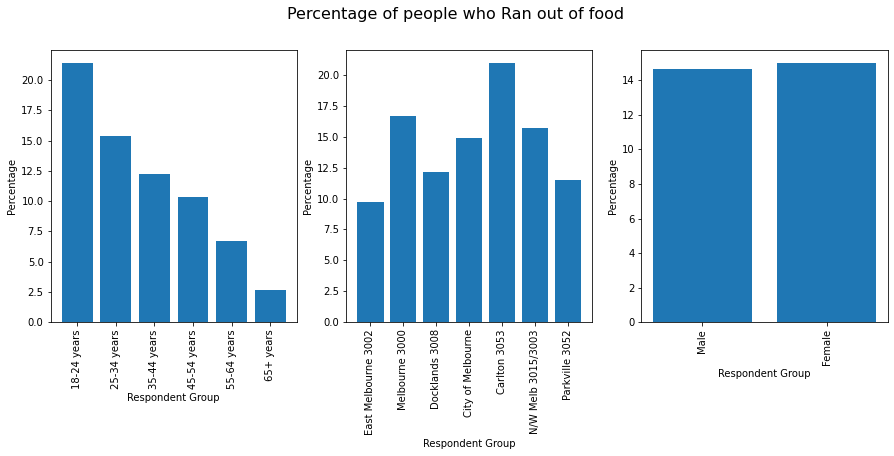

In [29]:
demographic_comparison_barchart(4, data_age, data_area, data_gender)
demographic_comparison_barchart(5, data_age, data_area, data_gender)
demographic_comparison_barchart(6, data_age, data_area, data_gender)

As can be seen from this graph, food security steadily and consistently increases with age. Furthermore, it is lowest in the area of Carlton, where a large amount of young people reside. The food insecurity in this case had the same pattern both for perception and materialization.

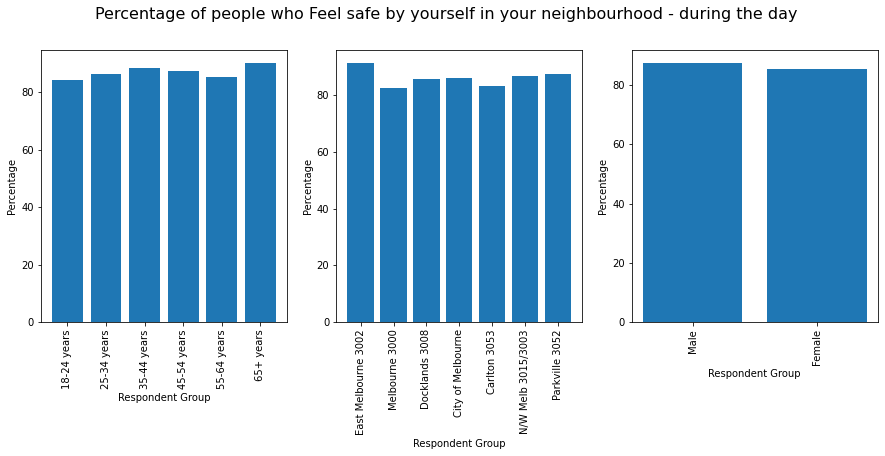

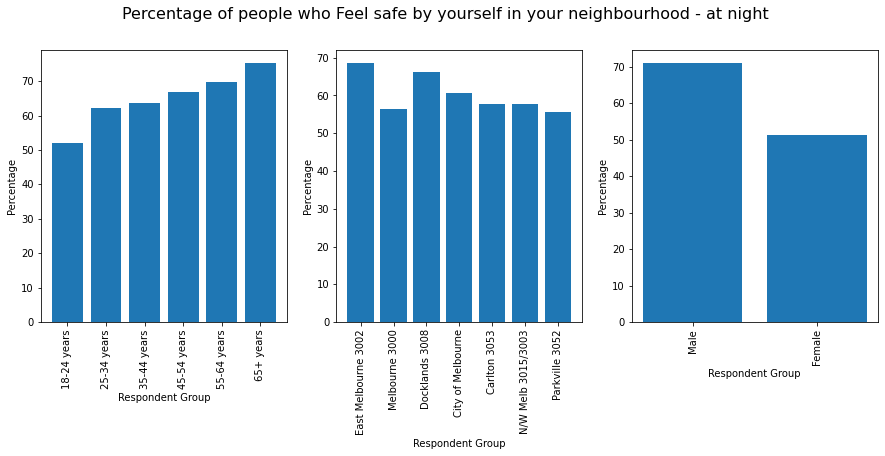

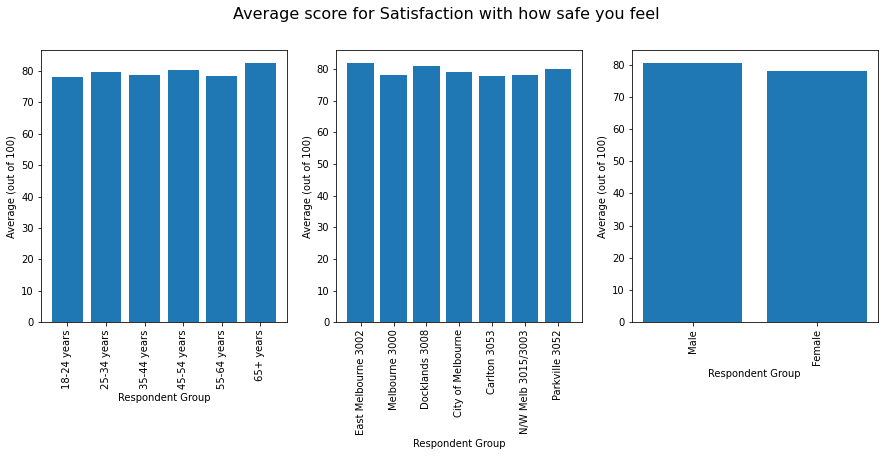

In [30]:
demographic_comparison_barchart(7, data_age, data_area, data_gender)
demographic_comparison_barchart(8, data_age, data_area, data_gender)
demographic_comparison_barchart(16, data_age, data_area, data_gender)

From these graphs it can be observed that safety perceptions between respondend groups are relatively similar, however females generally feel less safe, with this difference increasing heavily at night. 

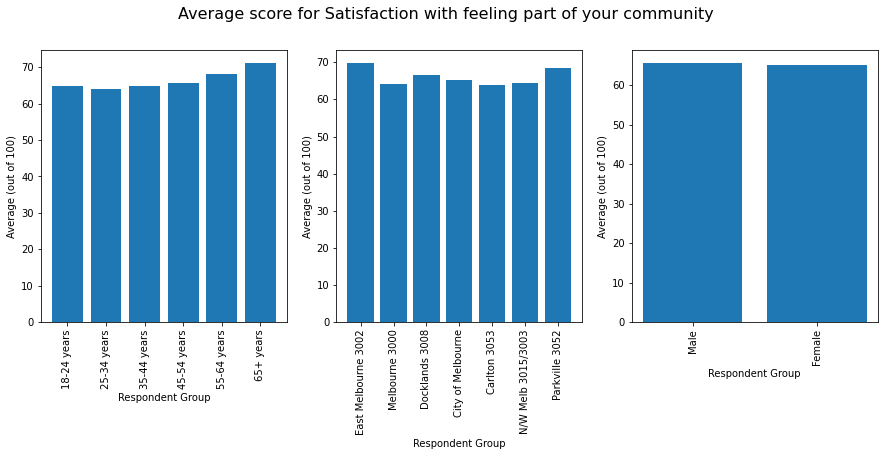

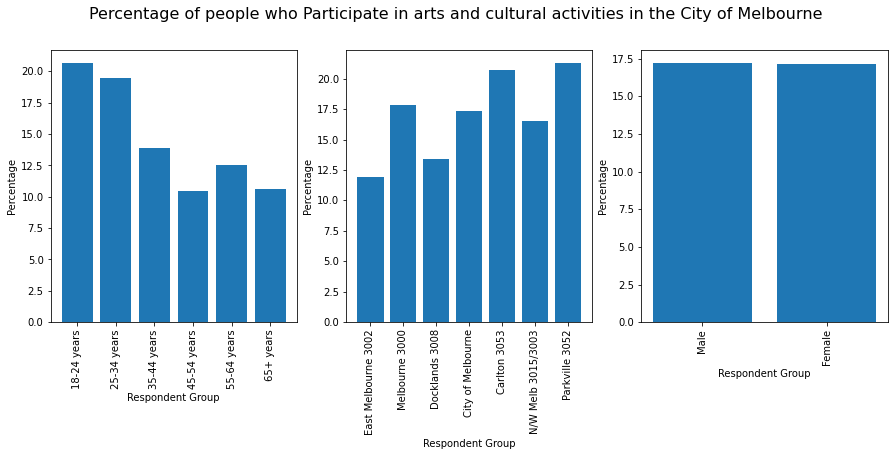

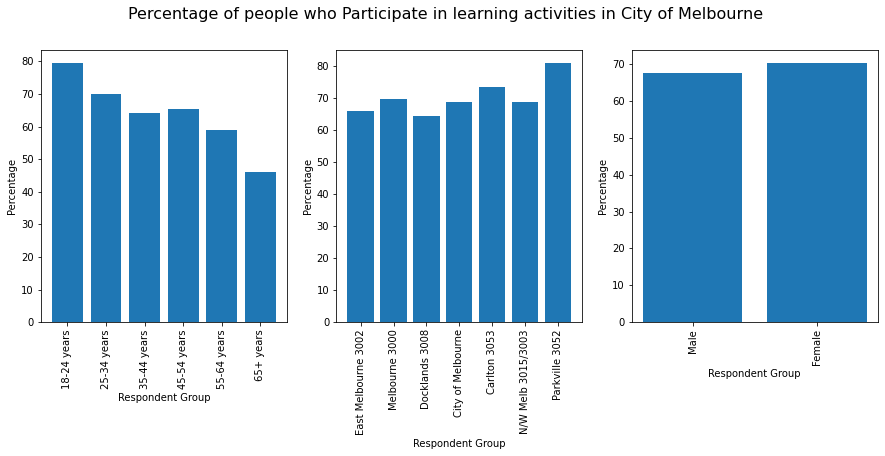

In [31]:
demographic_comparison_barchart(17, data_age, data_area, data_gender)
demographic_comparison_barchart(23, data_age, data_area, data_gender)
demographic_comparison_barchart(24, data_age, data_area, data_gender)

These graphs show an interesting pattern, where older respondents were not as likely to participate in learning activites, or arts/cultural activites (at least within the City of Melbourne), however still showed an equal or slightly higher satisfaction in terms of feeling as part of their community in comparison to younger age groups.

### Merging older dataset

Even though the datasets from 2018-2023 contain slight differences, they still follow a very similar format, both in the measurements and the indicators that were measured. An earlier dataset containing information regarding various indicators from 2012-2016 can be found, with some overlapping indicators. In this section we will attempt to find the indicators that have overlap, and see how the values from them have changed from this earlier time period.

In [32]:
#List of all descriptions/indicators from the 2012-2016 dataset
common_early = data_2012_2016['Indicator description'].unique()
print(common_early)

['Personal subjective wellbeing Index (average out of 100)'
 'How satisfied people feel with their personal relationships (average out of 100)'
 'How satisfied people feel with their safety (average out of 100)'
 'How satisfied people are with feeling part of the community (average out of 100)'
 'People Self-Reporting Health as Excellent or Very Good'
 'People Who Feel Safe or Very Safe in public spaces and places During the Day'
 'People Who Feel Safe or Very Safe in public spaces and places alone at night'
 'People who gave their time as volunteers'
 'People who experienced food insecurity in the last 12 months'
 'People Who ran out of Food in the Last 12 Months and Could Not Afford to Buy More'
 'People who skipped meals or ate less in the last 12 months because they worried about not having enough food'
 'People Who Participated in Arts and Related Activities in the Last Month'
 'People Who Agree that It is a Good Thing for a Society to Be Made Up of People from Different Cultures'

In [33]:
#These are all the indicators that are manually selected to be (almost) indentical, allowing comparison.
#Replacing the old indicator names with the ones from the 2018-2023 dataset.
data_2012_2016['Indicator description'] = data_2012_2016['Indicator description'].replace('Personal subjective wellbeing Index (average out of 100)', 'Personal Wellbeing Index (subjective wellbeing combined)')
data_2012_2016['Indicator description'] = data_2012_2016['Indicator description'].replace('How satisfied people feel with their personal relationships (average out of 100)', 'Satisfaction with personal relationships')
data_2012_2016['Indicator description'] = data_2012_2016['Indicator description'].replace('How satisfied people feel with their safety (average out of 100)', 'Satisfaction with how safe you feel')
data_2012_2016['Indicator description'] = data_2012_2016['Indicator description'].replace('How satisfied people are with feeling part of the community (average out of 100)', 'Satisfaction with feeling part of your community')
data_2012_2016['Indicator description'] = data_2012_2016['Indicator description'].replace('People who gave their time as volunteers', 'Help out as a volunteer')
data_2012_2016['Indicator description'] = data_2012_2016['Indicator description'].replace('How satisfied people feel with their health (average out of 100)', 'Satisfaction with health')
data_2012_2016['Indicator description'] = data_2012_2016['Indicator description'].replace('How satisfied people feel with what people are currently achieving in life (average out of 100)', 'Satisfaction with currently achieving in life')
data_2012_2016['Indicator description'] = data_2012_2016['Indicator description'].replace('People Who worried about running out of Food in the Last 12 Months', 'Worried food would run out')
data_2012_2016['Indicator description'] = data_2012_2016['Indicator description'].replace('How satisfied people feel with their standard of living (average out of 100)', 'Satisfaction with standard of living')
data_2012_2016['Indicator description'] = data_2012_2016['Indicator description'].replace('How satisfied people feel with their future security (average out of 100)', 'Satisfaction with future security')

In [34]:
#the indicators which can be compared against
common_list_both = ['Personal Wellbeing Index (subjective wellbeing combined)', 'Satisfaction with personal relationships',
                   'Satisfaction with how safe you feel', 'Satisfaction with feeling part of your community',
                   'Help out as a volunteer', 'Satisfaction with health', 'Satisfaction with currently achieving in life',
                   'Worried food would run out', 'Satisfaction with standard of living', 'Satisfaction with future security']

In [35]:
#Creating composite df 
listc = []
#loops through each indicator
for i in range(len(common_list)):
    #loops through each unique respondent group
    for x in unique_groups:
        list_of_results = [] 
        list_of_results.append(common_list[i])
        list_of_results.append(x)
        format_type = 'placeholder'
        #gets the result and result format 
        for df in df_list:
            res = df[(df['DESCRIPTION'] == common_list[i]) & (df['RESPONDENT GROUP'] == x)]['RESULT'].iloc[0]
            format_type = df[(df['DESCRIPTION'] == common_list[i]) & (df['RESPONDENT GROUP'] == x)]['FORMAT'].iloc[0]
            list_of_results.append(res)
        #determines the format to use 
        if format_type == 'Per cent':
            format_type = 'Percent'
        if format_type == 'Average':
            format_type = 'Average (out of 100)'
        list_of_results.append(format_type)
        listc.append(list_of_results)
        average = 0
        
data_comp = pd.DataFrame(listc, columns=['DESCRIPTION', 'GROUP', '2018','2019','2020','2021','2022','2023', 'FORMAT'])

In [36]:
#dropping uncessary columns
data_2012_2016 = data_2012_2016.drop(columns=['Population', 'Source', 'Unit'])

In [37]:
#indicator labels to seperate by group with same format
for index, row in data_2012_2016.iterrows():
    if '(Male)' in row[0]:
        data_2012_2016.at[index, 'Indicator label'] = 'Male'
    elif '(Female)' in row[0]:
        data_2012_2016.at[index, 'Indicator label'] = 'Female'
    elif '(18-35 yrs)' in row[0] or '(36 yrs and over)' in row[0]:
        data_2012_2016.drop(index, inplace=True)
    else:
        data_2012_2016.at[index, 'Indicator label'] = 'City of Melbourne'

In [38]:
#renaming columns to same format
data_2012_2016 = data_2012_2016.rename(columns={'Indicator description': 'DESCRIPTION', 'Indicator label': 'GROUP'})

In [39]:
#Keeping only common indicators between both dataframes
data_comp_common = data_comp[data_comp['DESCRIPTION'].isin(common_list_both)]
data_early_common = data_2012_2016[data_2012_2016['DESCRIPTION'].isin(common_list_both)]

In [40]:
#removing uncessary groups
groups_to_keep = ['Male', 'Female', 'City of Melbourne']
data_comp_common = data_comp_common[data_comp_common['GROUP'].isin(groups_to_keep)]

In [41]:
#merging dataframes
merged_df = pd.merge(data_comp_common, data_early_common, on=['GROUP', 'DESCRIPTION'])
merged_df.head()

,DESCRIPTION,GROUP,2018,2019,2020,2021,2022,2023,FORMAT,2012,2013,2014,2015,2016
0,Worried food would run out,Male,17.0,20.5,26.8,26.1,18.5,19.4,Percent,7.0,6.5,4.5,1.5,7.8
1,Worried food would run out,City of Melbourne,19.7,20.4,25.8,27.3,21.5,22.0,Percent,7.2,5.8,7.0,5.5,7.8
2,Worried food would run out,Female,22.2,20.2,24.5,28.0,23.8,24.6,Percent,7.5,5.0,9.5,9.5,7.7
3,Help out as a volunteer,Male,40.1,43.0,37.9,29.0,30.5,29.9,Percent,41.0,54.0,55.0,48.0,50.6
4,Help out as a volunteer,City of Melbourne,43.3,41.2,37.1,30.7,30.6,32.2,Percent,42.8,49.3,48.8,44.0,47.8


### Graphing 2012-2016 Data and Comparing with 2018-2023

Similarly to the previous graphs, we will now create graphs to show the difference in indicator results from the earlier 2012-2016 years to the later 2018-2023 years. However as noticed, there are less indicators to compare as there is less overlap between these datasets.

In [42]:
#this shows all shared indicators for the whole grouped CoM respondent group
listyear = ['2012', '2013', '2014', '2015', '2016', '2018', '2019', '2020', '2021', '2022', '2023']
shared_indicators_CoM = merged_df['DESCRIPTION'].unique().tolist()
shared_indicators_CoM

['Worried food would run out',
 'Help out as a volunteer',
 'Satisfaction with standard of living',
 'Satisfaction with health',
 'Satisfaction with currently achieving in life',
 'Satisfaction with personal relationships',
 'Satisfaction with how safe you feel',
 'Satisfaction with feeling part of your community',
 'Satisfaction with future security',
 'Personal Wellbeing Index (subjective wellbeing combined)']

In [43]:
#this shows the indicators that are also split by gender, allowing comparison between these 
un = merged_df['DESCRIPTION'].unique().tolist()
merged_df['DESCRIPTION'].count()
shared_indicators_all = []
for i in un:
    #3 counts meaning M/F and CoM 
    ct = merged_df[merged_df['DESCRIPTION'] == i]['DESCRIPTION'].count()
    if ct == 3:
        shared_indicators_all.append(i)
shared_indicators_all

['Worried food would run out',
 'Help out as a volunteer',
 'Satisfaction with personal relationships',
 'Satisfaction with how safe you feel',
 'Satisfaction with feeling part of your community',
 'Personal Wellbeing Index (subjective wellbeing combined)']

In [44]:
#This function creates a graph to plot the comparison for the full CoM respondent group, allowing easy comparison of indicators.

#The green line is the data extracted from the 2012-2016 dataset  
#The yellow line is the data extracted from the datasets ranging 2018-2023  
#The blue dotted line is there in place of missing 2017 data

def comparison_graph_CoM(indicator_num):
    row = merged_df[(merged_df['DESCRIPTION'] == shared_indicators_CoM[indicator_num]) & (merged_df['GROUP'] == 'City of Melbourne')]
    row = row.iloc[0]
    listval = row["2012": "2016"].tolist() + row["2018": "2023"].tolist()
    
    plt.figure(figsize = (16,5))
    y = listval
    x = listyear
    plt.plot(x[:5], y[:5], color='green')
    plt.plot(x[4:6], y[4:6], color='blue', linestyle='--')
    plt.plot(x[5:], y[5:], color='orange')
    plt.title('City of Melbourne amount of people who : ' + row['DESCRIPTION'])
    plt.ylabel(row['FORMAT'])
    plt.xlabel('Year')
    plt.show()

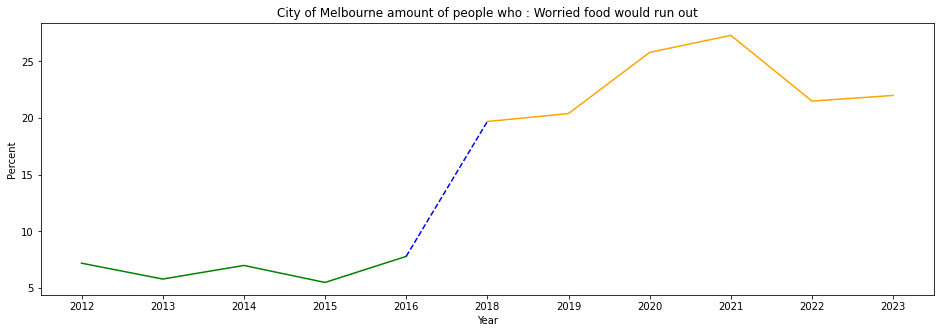

In [45]:
comparison_graph_CoM(0)

In [46]:
#This function has very similar logic to the above, however it compares the indicators based on CoM respondents as a whole,
#as well as grouped by male and female. This sadly has less results as some indicators were not split into these groups.
def comparison_graph_all(indicator_num):
    row_m = merged_df[(merged_df['DESCRIPTION'] == shared_indicators_all[indicator_num]) & (merged_df['GROUP'] == 'Male')].iloc[0]
    row_f = merged_df[(merged_df['DESCRIPTION'] == shared_indicators_all[indicator_num]) & (merged_df['GROUP'] == 'Female')].iloc[0]
    row_a = merged_df[(merged_df['DESCRIPTION'] == shared_indicators_all[indicator_num]) & (merged_df['GROUP'] == 'City of Melbourne')].iloc[0]
    listval_m = row_m["2012": "2016"].tolist() + row_m["2018": "2023"].tolist()
    listval_f = row_f["2012": "2016"].tolist() + row_f["2018": "2023"].tolist()
    listval_a = row_a["2012": "2016"].tolist() + row_a["2018": "2023"].tolist()
    
    fig, axs = plt.subplots(1,3, figsize = (16,5))
    fig.suptitle('Amount of people who: ' + row_a['DESCRIPTION'], fontsize=16, y=1, x=0.5)
    axs[0].plot(listyear[:5], listval_m[:5], color='green')
    axs[0].plot(listyear[4:6], listval_m[4:6], color='blue', linestyle='--')
    axs[0].plot(listyear[5:], listval_m[5:], color='orange')
    axs[0].set_ylabel(row_a['FORMAT'])
    axs[0].set_xlabel('Year')
    axs[0].tick_params(axis='x', rotation=90)
    axs[0].set_title('Respondent group: ' + row_m['GROUP'])
    
    axs[1].plot(listyear[:5], listval_f[:5], color='green')
    axs[1].plot(listyear[4:6], listval_f[4:6], color='blue', linestyle='--')
    axs[1].plot(listyear[5:], listval_f[5:], color='orange')
    axs[1].set_ylabel(row_a['FORMAT'])
    axs[1].set_xlabel('Year')
    axs[1].tick_params(axis='x', rotation=90)
    axs[1].set_title('Respondent group: ' + row_f['GROUP'])
    
    axs[2].plot(listyear[:5], listval_a[:5], color='green')
    axs[2].plot(listyear[4:6], listval_a[4:6], color='blue', linestyle='--')
    axs[2].plot(listyear[5:], listval_a[5:], color='orange')
    axs[2].set_ylabel(row_a['FORMAT'])
    axs[2].set_xlabel('Year')
    axs[2].tick_params(axis='x', rotation=90)
    axs[2].set_title('Respondent group: ' + row_a['GROUP'])
    
    plt.show()

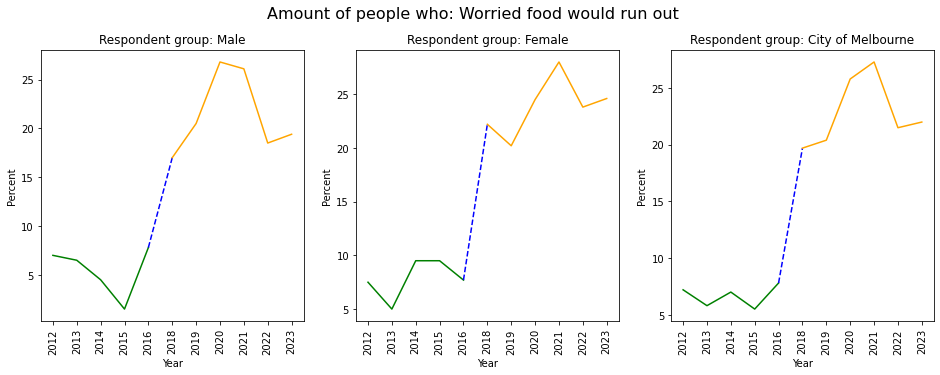

In [47]:
comparison_graph_all(0)

### Visualization, Analysis

Shown below are some examples of the the interesting patterns that can be found from this data, using the aggregated CoM results. I also grouped these logically, and provided some analysis on the observations made from these.

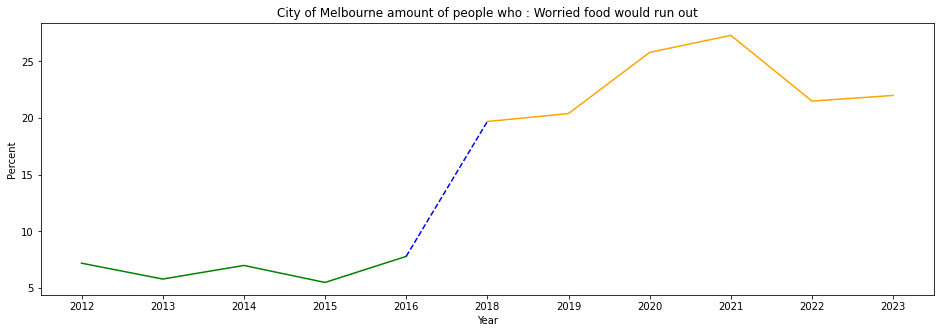

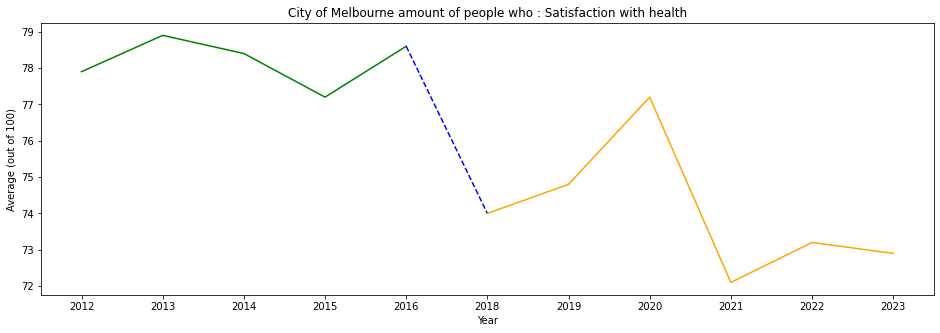

In [48]:
comparison_graph_CoM(0)
comparison_graph_CoM(3)

Focus: Food security and health  
From these graphs it can be observed that the percentage of people having food insecurity drastically increased from a relatively steady baseline during 2012-2016, with covid worsening this issue further.  
Similarly, satisfaction with health seemed to worsen during the later datasets, with a rebound in 2020, yet a steep decline following it.

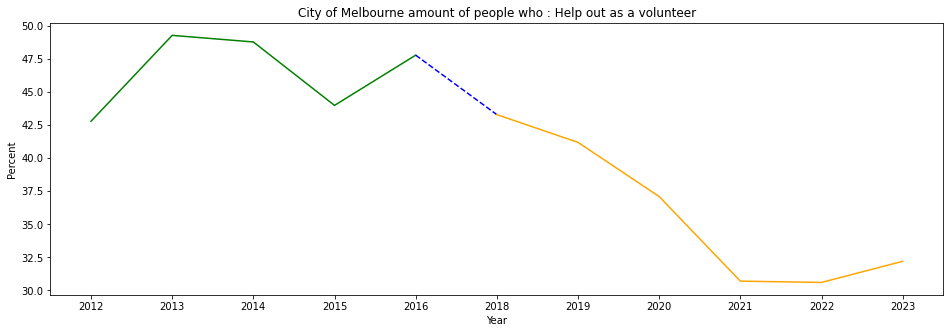

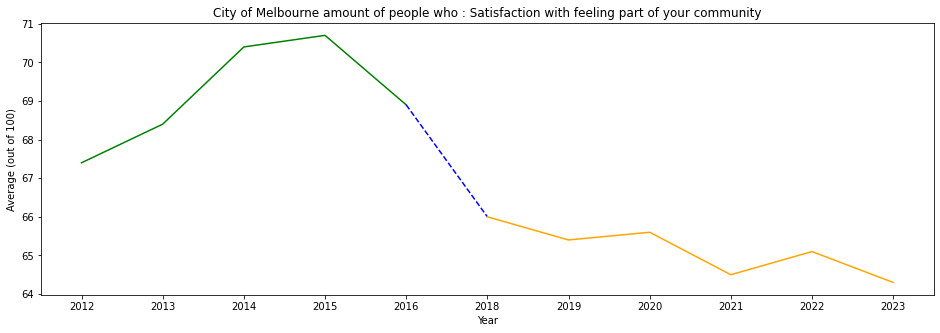

In [49]:
comparison_graph_CoM(1)
comparison_graph_CoM(7)

Focus: Community participation  
Community participation was already seeing a decline from 2018 onwards, compared to the previous 2012-2016 years, and this already decreasing participation only worsened following covid. 

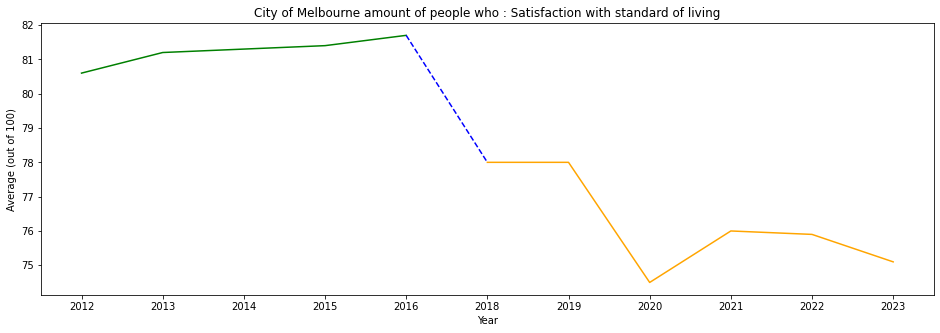

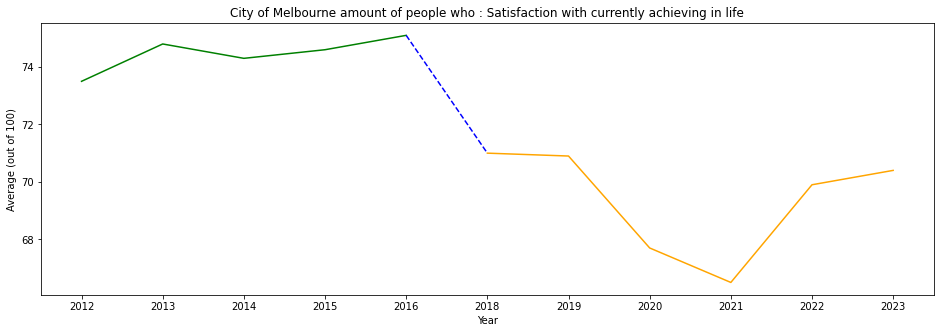

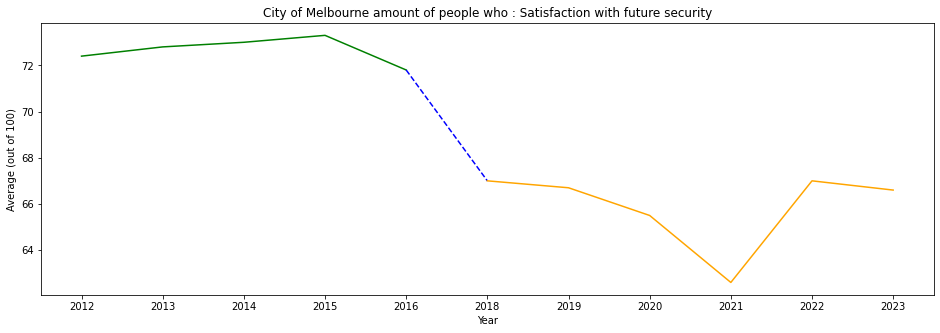

In [50]:
comparison_graph_CoM(2)
comparison_graph_CoM(4)
comparison_graph_CoM(8)

Focus: Life Satisfaction  
The many indicators here focusing on life satisfaction all share a similar trend, with general life satisfaction indicators showing a decrease from their 2012-2016 ranges, and an even greater decrease later to a low in 2020/21. There seems to be indication of a small bounce following these lows, however more data collection throughout later years would be needed to determine if this will continue.

### Results/Conclusions

Throughout this usecase, I was able to successfully analyse multiple social indicators, compared across both time and respondent group. Doing this revealed interesting patterns across multiple key areas, such as community participation/health etc. I believe this reveals some insight into where resources could potentially be allocated, in order to improve peoples wellbeing.  
- Food insecurity was consistently low during the 2012-2016 years, however has considerably worsened in the later years, peaking during covid. This also impacts young people the most, as this insecurity consistently decreases with age, both in terms of how its percieved (worried about food) and materialised (actually running out of food).
- This pattern continues with multiple personal wellbeing/life satisfaction/health indicators, which all had higher scores during the 2012-2016 period, worsening recently, with covid yet again exacerbating this.
- Similarly, community participation/feeling as part of your community/amount of people helping out as a volunteer was much higher during the earlier time period for all of these, especially volunteering, which saw a major drop during the later years, with an expected low through covid.    

These indicators all have some relation to each other, and show a potentially worrying trend of decreasing living standards in some areas. I believe this shows the imporance of resource allocation to attempt to alleviate these, especially in critical areas like food security.